# Chapter 7:  Data Science

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [114]:
import pandas as pd
df = pd.read_csv("covid19.csv")
#df.to_csv("covid19.csv", index=False)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [115]:
df.tail()

,date,state,fips,cases,deaths
54545,2022-11-11,Virginia,51,2131894,22232
54546,2022-11-11,Washington,53,1844567,14685
54547,2022-11-11,West Virginia,54,610675,7538
54548,2022-11-11,Wisconsin,55,1909301,15522
54549,2022-11-11,Wyoming,56,179366,1917


*What are the columns?*

In [116]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [117]:
df.shape

(54550, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [118]:
df.describe()

,fips,cases,deaths
count,54550.000000,5.455000e+04,54550.00000
mean,32.208964,7.656955e+05,10692.41659
std,18.772212,1.296653e+06,16101.83634
min,1.000000,1.000000e+00,0.00000
25%,17.000000,5.673500e+04,951.00000
50%,31.000000,3.008700e+05,4398.00000
75%,46.000000,9.015760e+05,13442.75000
max,78.000000,1.141172e+07,97142.00000


In [119]:
x = df.describe()
x.iloc[1].iat[1]
#y = pd.to_numeric(df['cases'])
df['cases'] = pd.to_numeric(df['cases'])
df['cases'].astype(float).idxmax()

54499

*Cases and Deaths in the USA due to Covid-19*

<AxesSubplot:xlabel='cases', ylabel='deaths'>

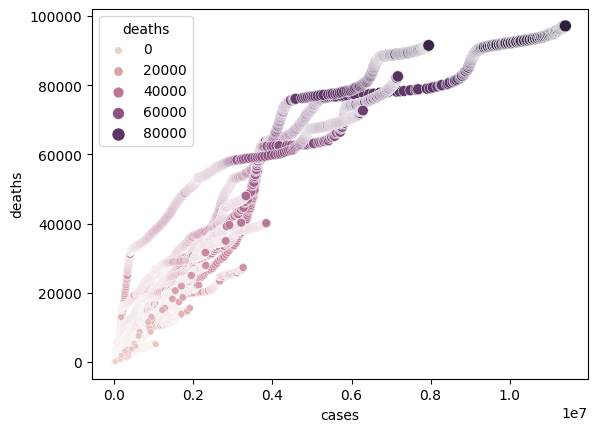

In [120]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [121]:
import numpy
# sort the data frame by fips code
df = df.sort_values(by='fips')
# get the unique sorted fips codes and states
states = pd.unique(df['state'])
fips = pd.unique(df['fips'])

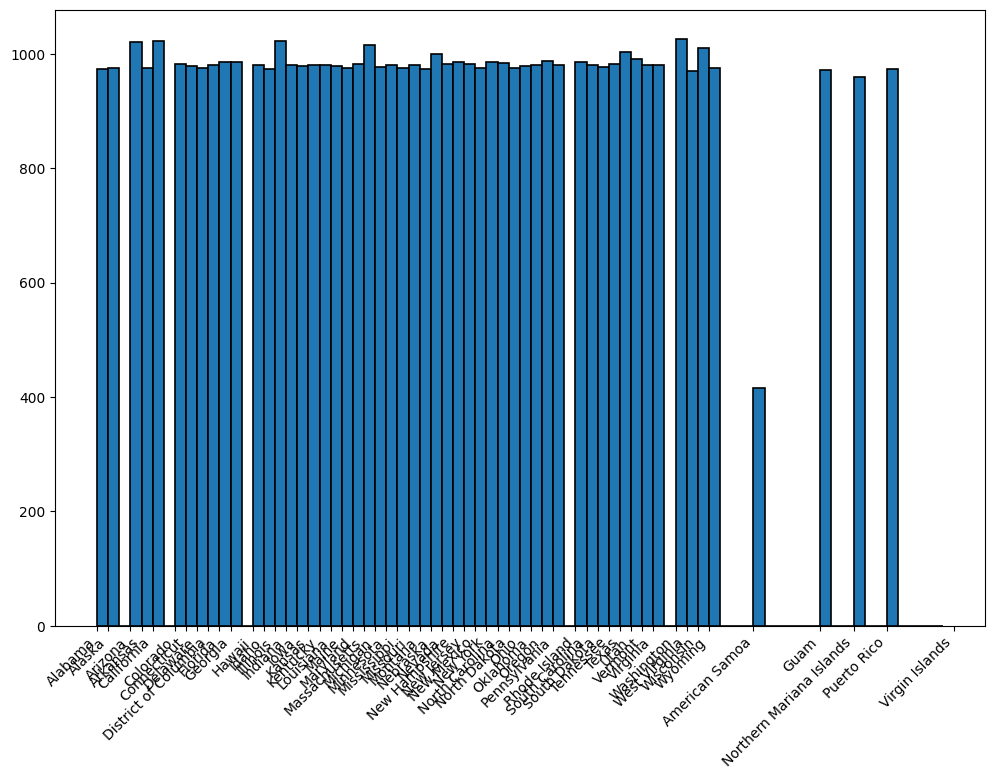

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12,8), dpi= 100)
ax = fig.add_subplot(111)
bins = list(range(min(fips), max(fips)))
plt.hist(data=df, x = 'fips', bins = bins, edgecolor='black', linewidth=1.2)
plt.xticks(fips, states)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(states, rotation = 45, ha="right");

/tmp/ipykernel_11785/1812298821.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(latest_rows['state'], rotation = 45, ha="right");
/tmp/ipykernel_11785/1812298821.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(latest_rows['state'], rotation = 45, ha="right");


Text(0.5, 1.0, 'Thousand deaths')

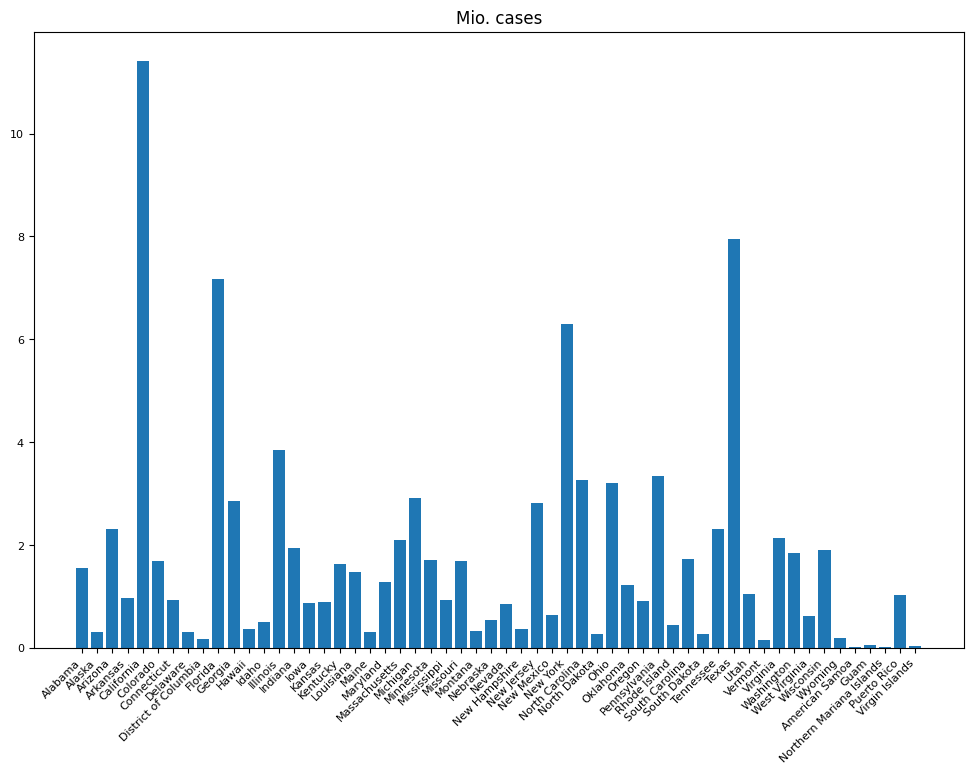

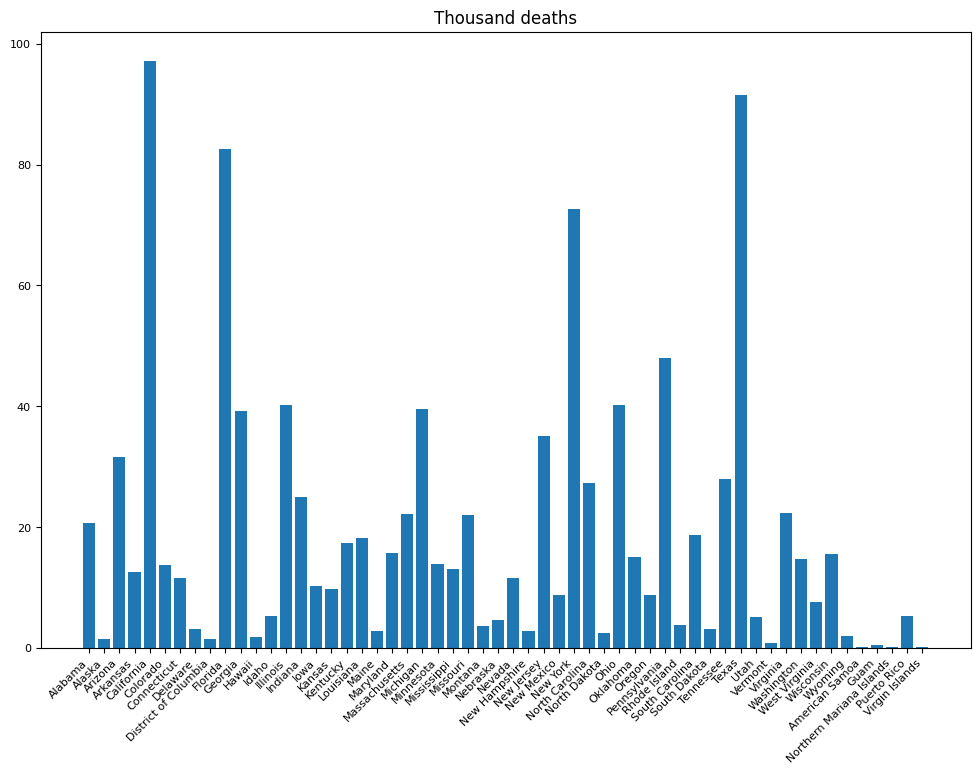

In [123]:
fig = plt.figure(1, figsize=(12,8), dpi= 100)
ax = fig.add_subplot(111)
#groupdata = df.groupby(['state']).sum()
# subset the data from the latest date
lastdate = max(df['date'])
latest_idx = pd.Index(df['date']==lastdate)
latest_rows = df.iloc[latest_idx]
plt.bar(latest_rows['state'], latest_rows['cases']/1000000)
#plt.xticks(fips, states)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticklabels(latest_rows['state'], rotation = 45, ha="right");
ax.set_title('Mio. cases')

fig = plt.figure(2, figsize=(12,8), dpi= 100)
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticklabels(latest_rows['state'], rotation = 45, ha="right");
ax.set_title('Mio. cases')
plt.bar(latest_rows['state'], latest_rows['deaths']/1000)
ax.set_title('Thousand deaths')

### Date-based EDA

*Dealing with dates by setting index*

In [124]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [125]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2023-04-25
Two days ago 2023-04-23


In [126]:
df.loc[daybefore:today].head() # this requires the dataset to be updated today
# fix:
lastdate = max(df.index)
# pretty sure they mean to access the last day in the data set only
daybefore = lastdate - timedelta(days = 1)
print(f"Last date {lastdate}")
print(f"Day before {daybefore}")

Last date 2023-03-23 00:00:00
Day before 2023-03-22 00:00:00


*The distribution of the data by date*

In [127]:
#%pip install -U seaborn # required for seaborn histplot. need to restart kernel after this

/tmp/ipykernel_11785/47191854.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[daybefore]["deaths"], shade=True)


<AxesSubplot:xlabel='deaths', ylabel='Density'>

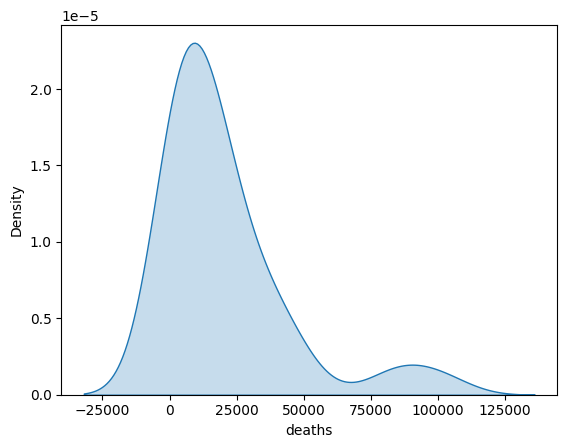

In [128]:
import seaborn
sns.kdeplot(df.loc[daybefore]["deaths"], shade=True)

<AxesSubplot:xlabel='deaths', ylabel='Count'>

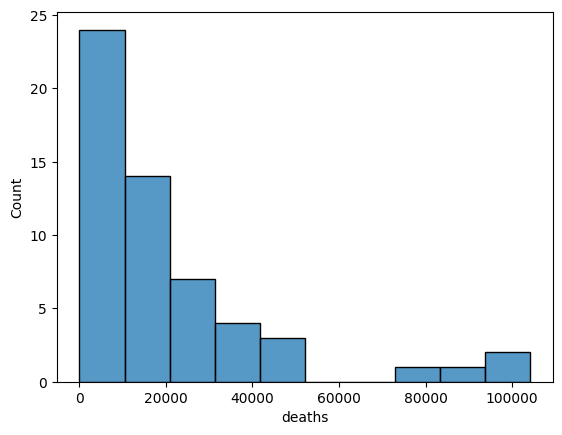

In [129]:
sns.histplot(df.loc[daybefore]["deaths"], bins = 10)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [130]:
current_df = df.loc[daybefore].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-22,California,6,12155467,104196
2023-03-22,Texas,48,8447168,94515
2023-03-22,Florida,12,7542869,87141
2023-03-22,New York,36,6803974,80138
2023-03-22,Pennsylvania,42,3539135,50701
2023-03-22,Michigan,26,3068195,42311
2023-03-22,Ohio,39,3408238,42017
2023-03-22,Illinois,17,4099448,41573
2023-03-22,Georgia,13,2984923,41055


*There should be 50 states and District of Columbia*

In [131]:
current_df.shape
print(numpy.sort(pd.unique(df['state'])))

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Puerto Rico' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virgin Islands'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


### State Based Analysis

*Get 10 states and subset*

In [132]:
top_ten_states = list(current_df["state"].head(10).values)
top_three_states = list(current_df["state"].head(3).values)
top_three_states

['California', 'Texas', 'Florida']

In [133]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")
top_three_states_df = df[df['state'].isin(top_three_states)].drop(columns="fips")
top_three_states_df

,state,cases,deaths
date,,,
2020-01-25,California,1,0
2020-01-26,California,2,0
2020-01-27,California,2,0
2020-01-28,California,2,0
2020-01-29,California,2,0
...,...,...,...
2023-03-22,Florida,7542869,87141
2023-03-22,Texas,8447168,94515
2023-03-23,California,12169158,104277


*Verify the unique states left is the same 10*

In [134]:
set(top_states_df.state.values)

{'California',
 'Florida',
 'Georgia',
 'Illinois',
 'Michigan',
 'New Jersey',
 'New York',
 'Ohio',
 'Pennsylvania',
 'Texas'}

<Figure size 2100x700 with 0 Axes>

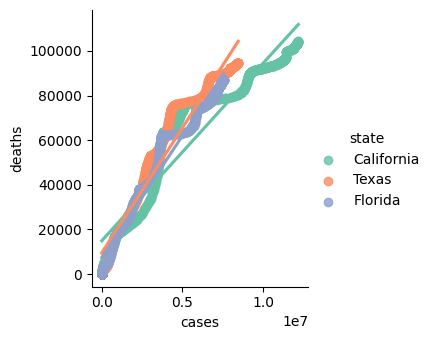

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(21,7))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    hue="state", 
                    palette="Set2",
                    data=top_three_states_df)
ax.fig.subplots_adjust(wspace=.2)

<Figure size 1500x500 with 0 Axes>

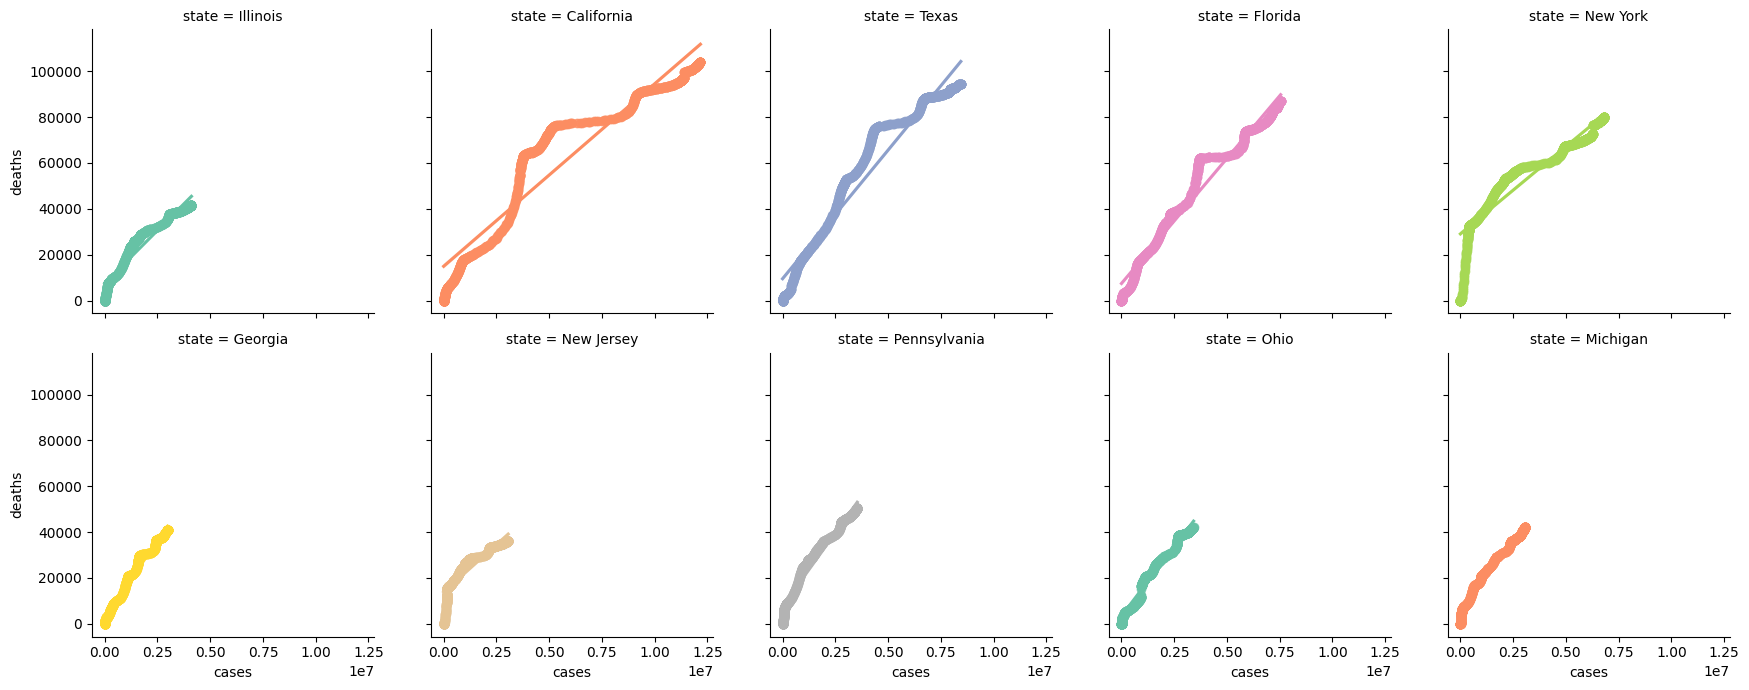

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [137]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2023-03-23,California,12169158,104277
2023-03-22,California,12155467,104196
2023-03-21,California,12154941,104185
2023-03-20,California,12154293,104165
2023-03-19,California,12153083,104130


### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [138]:
cdc_2013 = pd.read_csv("education_sugar_cdc_2003.csv")
cdc_2013.to_csv("education_sugar_cdc_2003.csv", index=False)
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  # I think this was the idea: add regex=True
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","", regex=True)
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [139]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [140]:
election_df = pd.read_csv("2016-Electoral-Votes.csv")
#election_df.to_csv("2016-Electoral-Votes.csv", index=False)
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False


In [141]:
sc_df = sugar_covid_df.merge(election_df, how="inner", on="state")
# need to drop the state column, not sure why
sc_df = sc_df.iloc[:,list(range(1,len(df. columns)))]
election_df

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False
5,Colorado,Democrats,True,False
6,Connecticut,Democrats,True,False
7,Delaware,Democrats,True,False
8,Florida,Republicans,False,True
9,Georgia,Republicans,False,True


*Generate Heatmap*

In [142]:
sc_df.corr()

,fips,cases,deaths
fips,1.000000,-0.120943,-0.127549
cases,-0.120943,1.000000,0.935557
deaths,-0.127549,0.935557,1.000000


<AxesSubplot:>

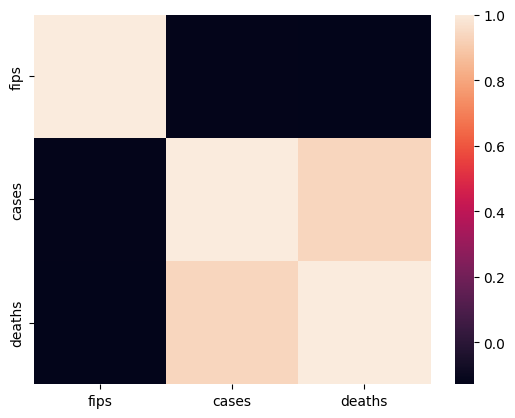

In [143]:
sns.heatmap(sc_df.corr())

In [144]:
sugar_covid_df.to_csv("covid-eda.csv")

## Modeling

In [145]:
# merge all data
full_table = sugar_covid_df.merge(election_df, how="inner", on="state")
# need to drop the stateand Winning Party columns, not sure why
full_table.drop(columns="state", inplace = True)
full_table.drop(columns="Winning Party", inplace = True)
full_table

,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
0,6,1,0,22.9,True,False
1,6,2,0,22.9,True,False
2,6,2,0,22.9,True,False
3,6,2,0,22.9,True,False
4,6,2,0,22.9,True,False
...,...,...,...,...,...,...
25712,54,644682,8126,46.1,False,True
25713,54,644682,8126,46.1,False,True
25714,54,644682,8126,46.1,False,True
25715,54,645710,8132,46.1,False,True


In [146]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#full_table.drop(columns="state")


X = full_table.drop(columns="Democrats")
y = full_table['Democrats']

y



0         True
1         True
2         True
3         True
4         True
         ...  
25712    False
25713    False
25714    False
25715    False
25716    False
Name: Democrats, Length: 25717, dtype: bool

In [147]:
# Select the top 3 features:
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(X,y)
# Now we create data frames for the features and the score of each feature:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)
# Finally, we’ll combine all the features and their corresponding scores in one data frame:
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Features', 'Score']
features_scores.sort_values(by = 'Score')
features_scores
# this doesn't seem right: 'Republicans' should be a perfect predictor for 'Democrats'!

# Now it’s time to get our hands dirty. First, split the dataset into X and Y:


,Features,Score
0,fips,7.933608e+03
1,cases,3.375239e+09
2,deaths,5.711517e+07
3,employed-sugar-intake-daily,4.224103e+04
4,Republicans,8.949000e+03
